# Ensemble Learning

이번 강의에서는 기계학습에서 널리 이용되는 앙상블 알고리즘에 대해 공부하도록 한다. 
먼저 앙상블 알고리즘이 무엇인지 설명하면 다음과 같다. 

## Ensemble Learning 이란?

앙상블 알고리즘을 요약하면 다음과 같이 설명이 가능하다
- 복합적인 알고리즘을 합쳐 하나의 태스크를 수행 (일종의 협동)
- 일반적으로 단일 모델보다 예측능력이 뛰어남 (다양한 기계학습 알고리즘을 조합도 가능) 

다음과 같은 시나리오에서 앙상블 학습이 가능하다. 

(예), 분류기에서 Decision Tree, Support Vector Machine, Logistic Regression 의 예측값의 다수결로 예측

      

## 왜 Ensemble Learning 을 사용하는가?

다음과 같은 이유로 앙상블 러닝이 유용하게 사용되고 있다. 
- 정확도 높은 예측 (또는 적은 에러율)
- 과적화를 최소화함 (모델의 consistency 가 높음)
- Bias, Variance error 를 줄임

그렇다면, 어느 경우 앙상블 러닝을 사용하면 좋은지 알아보자.

## Ensemble Learning 은 언제 사용하는가? 

- 단일 모들이 과적화 될 때 
- 결과를 볼 때, 학습이 더 필요할 수 있다고 생각될 때 
- 앙상블 러닝은 분류기나 회귀 두 경우 다 사용가능하다

## Bagging 과 Boosting

Ensemble Learning 은 크게 Bagging 과 Boosting 으로 나뉘며, 개념도를 아래와 같이 참고하면 이해가 쉽다.

### Random Forest

Bagging 알고리즘 중 널리 사용되는 Random Forest 에 대해 이번강의를 통해 공부하도록 하자. Random Forest 를 공부하기 위해서 Decision Tree에 관해 간략하게 먼저 설명을 하면 다음과 같다.

### Decision Tree

In [1]:
import numpy as np
import pandas as pd

RSEED = 50

다음과 같은 인공데이터를 기준으로 설명하겠다. X feature 값과 라벨값y 가 있다고 가정하자.

In [2]:
X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

위 데이터를 그래프로 시각화 하면 다음과 같다.

Text(0.5, 1.0, 'Data')

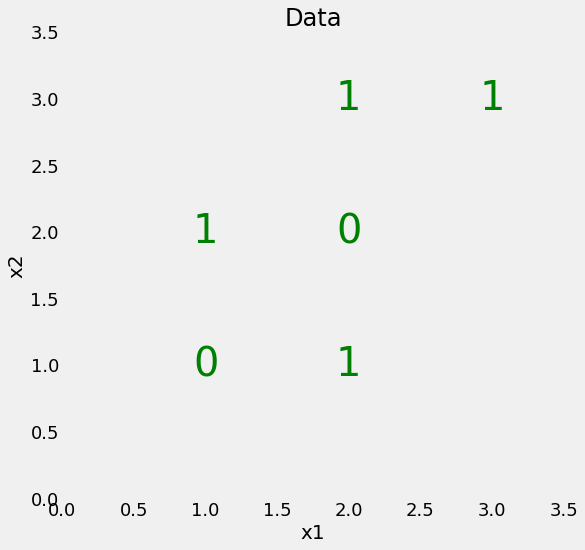

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

위 그래프를 볼 때, 선형으로 잘 분류가 되지 않다는 것을 볼 수 있다. Decision Tree는 이런 경우 강력하게 두 클래스를 분류를 할 수 있다 (좋은 것일 수도... 나쁜 것일 수도...)

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

우리가 학습한 트리의 모델 정확도를 점검하면 다음과 같다.

In [5]:
print(tree.score(X, y))

1.0


완벽에 가까운 것을 볼 수 있다. 이 Decision Tree가 어떤 구조를 갖고 있는지 시각화해보도록 하자

In [5]:
from sklearn.tree import export_graphviz

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = ['x1', 'x2'], 
                class_names = ['0', '1'], filled = True)

In [6]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [14]:
from IPython.display import Image
Image('tree.png')

이제 실제 데이터를 기반으로 Decision Tree를 테스트해보도록 하자.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
iris_data = load_iris()
model= DecisionTreeClassifier()
model.fit(iris_data.data, iris_data.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
dot = export_graphviz(model,
                     out_file=None,
                     feature_names = iris_data.feature_names,
                     class_names = iris_data.target_names,
                     filled=True,
                     impurity=None,
                     )
graph=graphviz.Source(dot)
graph.render("iris_decision_Tree")

NameError: name 'graphviz' is not defined

## Random Forest 만들기

Random Forest 는 다음과 같은 과정으로 만든다


- 숲의 나무 갯수 정하기 (M)
- 나무마다 샘플 숫자 정하기 (n)
- 각 나무에서 사용될 feature 숫자 정하기 (f)

M개의 각 트리에서 다음과 같은 작업을 수행한다:
 - n개의 샘플을 추출 (중복 허용)
 - f 개의 feature 임의로 추출 
 - n개의 샘플과 f개의 feature로 decision tree training 
 - decision tree 결과 저장


아래는 Decision Tree 와 Random Forest의 비교

In [2]:
from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

bc = load_breast_cancer()
X = bc.data
y = bc.target

# Create our test/train split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## build our models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

## Train the classifiers
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Create Predictions
dt_pred = decision_tree.predict(X_test)
rf_pred = random_forest.predict(X_test)

# Check the performance of each model
print('Decision Tree Model')
print(classification_report(y_test, dt_pred, target_names=bc.target_names))

print('Random Forest Model')
print(classification_report(y_test, rf_pred, target_names=bc.target_names))

#Graph our confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

Decision Tree Model
              precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Random Forest Model
              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        54
      benign       0.97      0.99      0.98        89

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Random Forest 가 예측을 하는 과정은 다음과 같다

측정된 관측이 여러개 있다고 할 때 (o).
각각의 트리에 대해 (t) in the model:
  - o를 기반으로 예측값  (p) 생성 
  - p 를 P (리스트 형식)에 저장 

모델이 분류기라면:
 - 다수결로 count 가 가장 많은 p를 선택 
모델이 회귀모델이면, 
 - 평균값 p를 알려줌

In [11]:
#Graph our confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

Normalized confusion matrix
[[0.94 0.06]
 [0.08 0.92]]


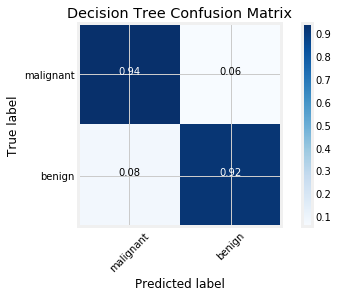

Normalized confusion matrix
[[0.94 0.06]
 [0.01 0.99]]


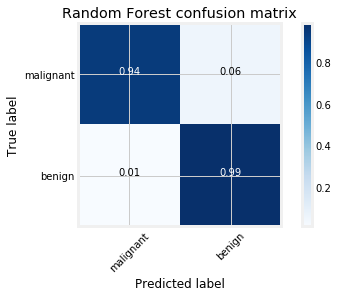

In [13]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)

# Plot dt confusion matrix
plt.figure()
plot_confusion_matrix(dt_cm, classes=bc.target_names, normalize=True,
                      title='Decision Tree Confusion Matrix')
plt.show()

# Plot rf confusion matrix
plt.figure()
plot_confusion_matrix(rf_cm, classes=bc.target_names, normalize=True,
                      title='Random Forest confusion matrix')

plt.show()